### Step1: Prerequest Libraries

In [224]:
%%capture

# data management
! pip install -U pandas
! pip install -U numpy

# data visualization
! pip install -U matplotlib
! pip install -U plotnine

# modeling
! pip install -U scikit-learn

In [225]:
import pandas as pd
import sklearn
sklearn.__version__

'1.0.2'

In [226]:
# Helper packages
import numpy as np
import pandas as pd
import math
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import compose
from sklearn import cross_decomposition
from sklearn import decomposition
from sklearn import model_selection
from sklearn import linear_model
from sklearn import pipeline

---

### Step2: Read Dataset
| Reading .CSV file from local directory |

In [227]:
H_data = pd.read_csv('/Users/awatefalshehri/Misk_DSI_2021/AA_ML_assignment/saudi_aqar_price_prediction/housing.csv')

# Initial dimensions
H_data.shape

H_data.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


---

### Step3: Features of the data

In [228]:
# features
H_data.drop("details", axis=1).head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,0,1,0,0,40000
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,0,1,0,0,0,1,1,1,0,45000
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,0,1,0,0,1,0,1,3300
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,1,0,1,0,0,1,0,0,36000
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,1,0,1,0,0,1,0,1,80000


In [229]:
# Response variable
H_data["price"].head()

0    40000
1    45000
2     3300
3    36000
4    80000
Name: price, dtype: int64

---

### Step4: Data splitting

In [230]:
# create train/test split
train, test = train_test_split(H_data, train_size=0.5, random_state=130)

# dimensions of training data
train.shape

(1487, 25)

In [231]:
y = H_data["pool"]
train_strat, test_strat = train_test_split(H_data, train_size=0.3, random_state=123, stratify=y)

In [232]:
# response distribution for raw data
H_data["price"].value_counts(normalize=True)

60000     0.088097
80000     0.083389
65000     0.065905
90000     0.053800
100000    0.051446
            ...   
330000    0.000336
420000    0.000336
38400     0.000336
2500      0.000336
66500     0.000336
Name: price, Length: 101, dtype: float64

In [233]:
# separate features from labels
X_train = train[["size"]]
y_train = train["price"]

# fit a KNN regression model with 10 neighbors
knn = KNeighborsRegressor(n_neighbors=10)
m1 = knn.fit(X_train, y_train)

m1

KNeighborsRegressor(n_neighbors=10)

In [234]:
m1.predict(X_train)

array([ 52500.,  88500.,  94300., ...,  53600., 118000.,  94300.])

### Step 5: Evaluating models

In [235]:
pred = m1.predict(X_train)

# compute MSE
mse = mean_squared_error(y_train, pred)
mse

3579431109.936113

In [236]:
# compute RMSE
math.sqrt(mse)

59828.34704332147

### Classification model

In [237]:
# convert response to binary ints
train_strat["pool"].replace(('Yes', 'No'), (1, 0), inplace=True)

# separate features from labels
X_train_strat = train_strat[["pool"]]
y_train_strat = np.array(train_strat["pool"])

# fit a KNN regression model with 10 neighbors
knn2 = KNeighborsClassifier(n_neighbors=10)
m2 = knn2.fit(X_train_strat, y_train_strat)

# make predictions
pred = m2.predict_proba(X_train_strat)

# compute AUC
roc_auc_score(y_train_strat, pred[:, 1])

1.0

### Resampling

In [238]:
# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=125, shuffle=True)

# fit model with 10-fold CV
results = cross_val_score(m1, X_train, y_train, cv=kfold, scoring=loss)
results

array([ -61617.69444424,  -41275.14090074,  -47005.40969153,
        -57129.97779114, -134221.66054165,  -71629.04808477,
        -44311.87442171,  -43475.9589127 ,  -47033.82839525,
        -37623.25367232])

In [239]:
results.mean()

-58532.38468560375

In [240]:
# 10 fold cross validation repated 5 times (total of 50 folds)
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
results = cross_val_score(m1, X_train, y_train, cv=rfk, scoring=loss)
results

array([ -47900.15235155,  -42527.91409394,  -44073.46768399,
        -58873.63450874,  -47147.14871954, -128393.14780269,
        -81707.1680376 ,  -44059.04481182,  -44891.57960117,
        -44864.66021811,  -70539.19839875,  -47327.33535508,
        -57807.15757104,  -51497.46234707,  -45636.12395605,
       -133214.7846386 ,  -41121.49025027,  -42169.02547639,
        -57206.13184153,  -44053.63074432,  -67790.27794029,
        -49997.56096065, -128619.71059558,  -35226.07808402,
        -43601.71264569,  -52198.92074407,  -41505.63713028,
        -70448.03576569,  -50312.69452036,  -55565.83841398,
        -44094.69846689,  -35276.23399066,  -55363.54815152,
        -41443.36638655,  -45290.66653481,  -55264.208055  ,
        -50788.95011409,  -59450.68824187, -140802.79751245,
        -43053.41811618,  -43013.49956856,  -43236.94297999,
        -55074.43453115,  -45782.01238903, -127906.98272127,
        -57521.98704225,  -77905.36733691,  -56180.05294274,
        -43994.59738023,

In [241]:
# average RMSE across all 50 folds
results.mean()

-58658.61626769833

## Hyperparameter tuning

In [242]:
# basic model object
knn = KNeighborsRegressor()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 25)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

58076.72287517404

In [243]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

17

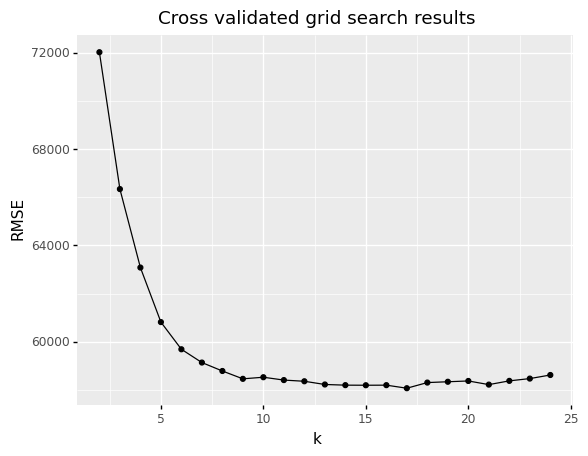

<ggplot: (8775444186149)>

In [244]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 25), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

## Putting the processes together

In [245]:
# create train/test split
train, test = train_test_split(H_data, train_size=0.6, random_state=123)

# separate features from labels and only use numeric features
X_train = train.select_dtypes(include='number').drop("price", axis=1)
y_train = train["price"]

# create KNN model object
knn = KNeighborsRegressor()

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 26)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

64887.36963467104

In [246]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

17

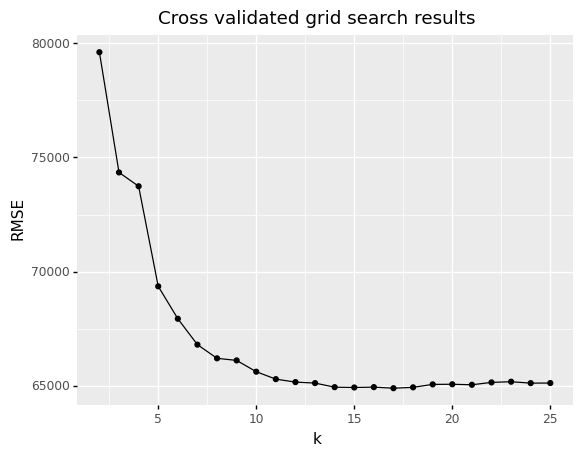

<ggplot: (8775445056976)>

In [247]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 26), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

In [261]:
# Saudi Aqar housing data
# ames = pd.read_csv("../data/housing.csv")

# create train/test split
train, test = train_test_split(H_data, train_size=0.7, random_state=123)

# separate features from labels and only use numeric features
X_train = train.drop("price", axis=1)
y_train = train[["price"]]

## Simple linear regression

In [262]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only pool feature
lm_fit = lm_mod.fit(X_train[["pool"]], y_train)

In [263]:
# intercept
lm_fit.intercept_

array([79154.85436893])

In [264]:
# coefficient for pool
lm_fit.coef_

array([[48839.08502501]])

### Interactions

In [265]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# use PolynomialFeatures to create main pool and roof effects and
# also an interaction effect between pool & roof
effects = preprocessing.PolynomialFeatures(
  interaction_only=True,
  include_bias=False
  )
features = effects.fit_transform(X_train[["pool", "roof"]])

# fit linear model with only pool and roof feature and
# also include an interaction effect (pool:roof)
lm_fit = lm_mod.fit(features, y_train)

In [253]:
# coefficients for pool, roof effects and the interaction 
# effect between pool & roof
lm_fit.coef_

array([[27925.47245678, -5386.58466542, 45156.58466542]])

## Assessing model accuracy

In [254]:
# feature sets to compare across
feature_set1 = X_train[["pool"]]
feature_set2 = X_train[["pool", "roof"]]
#feature_set3 = X_train_encoded
feature_sets = {'lm1': feature_set1, 'lm2': feature_set2}

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = model_selection.KFold(n_splits=10, random_state=8451, shuffle=True)

# object to store CV RMSE results
results = {}

for name, feat in feature_sets.items():
  # create LM model object
  lm_mod = linear_model.LinearRegression()

  # execute and score the cross validation procedure
  cv_results = model_selection.cross_val_score(
    estimator=lm_mod, 
    X=feat, 
    y=y_train, 
    cv=kfold, 
    scoring=loss
    )
  results[name] = np.absolute(cv_results.mean())

In [255]:
results

{'lm1': 67179.93754598113, 'lm2': 67209.97272818911}

## Principal component regression

In [256]:
# create linear model object
lm_mod = linear_model.LinearRegression()

# create k-fold cross validation object
kfold = model_selection.KFold(n_splits=5, random_state=8451, shuffle=True)

# define loss function
loss = 'neg_root_mean_squared_error'

# create our preprocessing steps which includes performing PCA 
# with 10 components
scaler = preprocessing.StandardScaler()
pca = decomposition.PCA(n_components=10)
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")
num_feat_only = compose.make_column_selector(dtype_include="number")
cat_feat_only = compose.make_column_selector(dtype_include="object")

# combine all steps into a pre-processing pipeline
preprocessor = compose.ColumnTransformer(
  remainder="passthrough",
  transformers=[
  ("std_encode", scaler, num_feat_only),
  ("pca_encode", pca, num_feat_only),
  ("one-hot", encoder, cat_feat_only),
  ])

# create a pipeline object that combines model with recipe
model_pipeline = pipeline.Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("lm", lm_mod),
])

# train and fit our model
cv_results = model_selection.cross_val_score(
  estimator=model_pipeline, 
  X=X_train, 
  y=y_train, 
  cv=kfold, 
  scoring=loss
  )

# get results
np.absolute(cv_results.mean())

57477.92703286157

### Tuning

In [257]:
# create k-fold cross validation object
kfold = model_selection.KFold(n_splits=5, random_state=8451, shuffle=True)

# define loss function
loss = 'neg_root_mean_squared_error'

# create our preprocessing steps
scaler = preprocessing.StandardScaler()
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")
num_feat_only = compose.make_column_selector(dtype_include="number")
cat_feat_only = compose.make_column_selector(dtype_include="object")

# create object to save results
results = {}

# iterate over over 2, 4, 6, ..., 26 components and train model
for n_comp in range(2, 28, 2):
  # create PCA object with n components
  pca = decomposition.PCA(n_components=n_comp)
  
# combine all steps into a pre-processing pipeline
  preprocessor = compose.ColumnTransformer(
    remainder="passthrough",
    transformers=[
    ("std_encode", scaler, num_feat_only),
    ("pca_encode", pca, num_feat_only),
    ("one-hot", encoder, cat_feat_only),
    ])

  # create linear model object
  lm_mod = linear_model.LinearRegression()

  # create a pipeline object that combines model with recipe
  model_pipeline = pipeline.Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lm", lm_mod),
  ])

  # train and fit our model
  cv_results = model_selection.cross_val_score(
    estimator=model_pipeline, 
    X=X_train, 
    y=y_train, 
    cv=kfold, 
    scoring=loss
    )

  # get results
  results[n_comp] = np.absolute(cv_results.mean())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/s

In [258]:
pd.DataFrame.from_dict(
  results,
  orient='index',
  columns=['RMSE']
  ).rename_axis('n_components').reset_index()

,n_components,RMSE
0,2,57481.766511
1,4,57479.005549
2,6,57479.517904
3,8,57477.662603
4,10,57473.595276
5,12,57476.834741
6,14,57477.046029
7,16,57476.580854
8,18,57477.182266
9,20,57478.008604


## Partial least squares

In [259]:
# create linear model object
pls_mod = cross_decomposition.PLSRegression()

# create k-fold cross validation object
kfold = model_selection.KFold(n_splits=5, random_state=8451, shuffle=True)

# define loss function
loss = 'neg_root_mean_squared_error'

# create our preprocessing steps to normalize and one-hot encode
scaler = preprocessing.StandardScaler()
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore", sparse=False)
num_feat_only = compose.make_column_selector(dtype_include="number")
cat_feat_only = compose.make_column_selector(dtype_include="object")

# combine all steps into a pre-processing pipeline
preprocessor = compose.ColumnTransformer(
  remainder="passthrough",
  transformers=[
    ("std_encode", scaler, num_feat_only),
    ("one-hot", encoder, cat_feat_only),
  ])

# create a pipeline object that combines model with recipe
model_pipeline = pipeline.Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("pls", pls_mod),
])

# Create grid of hyperparameter values
hyper_grid = {'pls__n_components': range(2, 28, 2)}

# Tune a knn model using grid search
grid_search = model_selection.GridSearchCV(
  model_pipeline, 
  hyper_grid, 
  cv=kfold, 
  scoring=loss
  )
  
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

54918.372113973615

In [260]:
# Optimal number of components
results.best_estimator_.get_params().get('pls__n_components')

4